## LGMVIP - DS Beginner level task #1: Iris Flowers classification Supervised ML
### Author: Zakaria Jnayni

![01](01.png)


### Load Libraries

In [9]:
# Load libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Load the dataset

In [2]:
df = pd.read_csv("iris.csv", header=None)
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data visualization

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

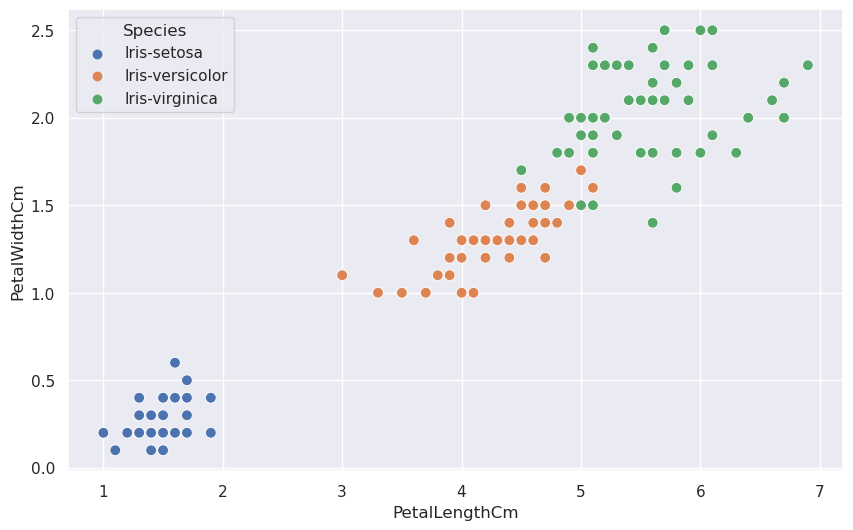

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.set_theme()

sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", s=60, hue='Species')

### Train Test Split   

In [10]:
X = df.drop(columns = ['Species'])
y = df['Species']

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

### Testing the models

In [12]:
LD = LinearDiscriminantAnalysis()
LGR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
GNB = GaussianNB()
SVC = SVC()

In [13]:
models = [LD, LGR, DT, RF, KNN, GNB, SVC]
scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print(type(model).__name__  + " is", accuracy_score(y_test, y_pred))

LinearDiscriminantAnalysis is 1.0
LogisticRegression is 0.9736842105263158
DecisionTreeClassifier is 0.9736842105263158
RandomForestClassifier is 0.9736842105263158
KNeighborsClassifier is 1.0
GaussianNB is 0.9736842105263158
SVC is 0.9736842105263158


### KNeighborsClassifier

In [14]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

### Model Validation

In [15]:
score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f'Test Accuracy KNN: {score}')
print('Classification Report KNN:')
print(clf_report)

Test Accuracy KNN: 1.0
Classification Report KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



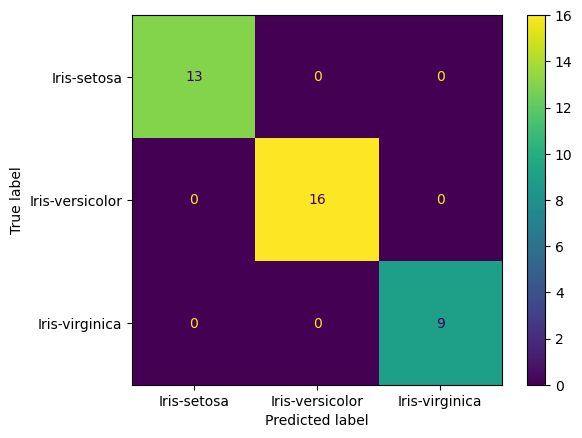

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()
plt.show()